In [2]:
from itertools import count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from werkzeug.debug.repr import missing

In [3]:
# Create a data frame and separate the columns by --> ;
data_frame = pd.read_csv('bank-full.csv', sep=';')

In [4]:
# Get first 5 rows of data frame
data_frame.head(500)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,admin.,single,secondary,no,0,yes,no,unknown,6,may,174,2,-1,0,unknown,no
496,39,blue-collar,divorced,secondary,no,42,yes,no,unknown,6,may,226,2,-1,0,unknown,no
497,50,blue-collar,divorced,secondary,no,41,yes,no,unknown,6,may,190,1,-1,0,unknown,no
498,44,blue-collar,married,secondary,no,-99,yes,no,unknown,6,may,111,2,-1,0,unknown,no


In [5]:
# Get information
data_frame.info()
print("--------------------")
data_frame.shape
# There are 45211 rows and 17 columns
# There are no missing values in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
--------------------


(45211, 17)

In [6]:
num = 1
for col in data_frame.select_dtypes(include='object').columns:
    print(str(num) + " " + col + " --> " + str(data_frame[col].unique()))
    num += 1

1 job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2 marital --> ['married' 'single' 'divorced']
3 education --> ['tertiary' 'secondary' 'unknown' 'primary']
4 default --> ['no' 'yes']
5 housing --> ['yes' 'no']
6 loan --> ['no' 'yes']
7 contact --> ['unknown' 'cellular' 'telephone']
8 month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9 poutcome --> ['unknown' 'failure' 'other' 'success']
10 y --> ['no' 'yes']


In [7]:
num = 1
for col in data_frame.select_dtypes(include='int64').columns:
    print(str(num) + " " + col)
    num += 1

1 age
2 balance
3 day
4 duration
5 campaign
6 pdays
7 previous


* There are 10 categorical columns and 7 numerical columns

### About dataset 

### Exploratory Data Analysis

* Select the correct columns for the model training
* Search for missing values

#### (1) --> Select the correct columns

* Select all columns except the last column
* The last column --> target column
* For the entire project all columns are selected, no need to remove.


In [8]:
# All Column names
all_columns = data_frame.columns
print(all_columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


#### (2) --> Search for missing values

In [9]:
# Handle missing values
missing_value_col = []

# Check each column for missing values
for column in data_frame.columns:
    # If the column has any missing values, add to the list
    if data_frame[column].isnull().sum() > 0:
        missing_value_col.append(column)

    
# If no missing values are found
if not missing_value_col:
    print("No missing value found")
else:
    print("Missing values found in columns: ", missing_value_col)

No missing value found


* No missing values found
* No need to handle missing values

#### (4) --> Find the features with one value (constant values)

In [10]:
# Iterate through all columns
for column in data_frame.select_dtypes(include='object').columns:
    # If a column has only one unique value
    print(column,data_frame[column].nunique())

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
y 2


* There are no single value columns

#### (4) --> Examine target variable distribution

In [11]:
# Distribution of target variable --> y (subscribed deposit or not)
print(data_frame['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


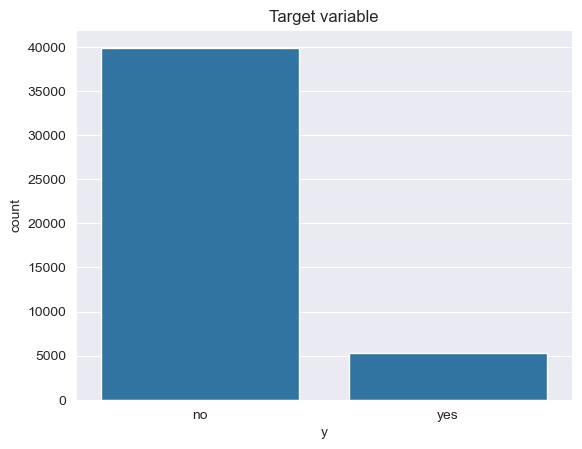

<Axes: ylabel='count'>

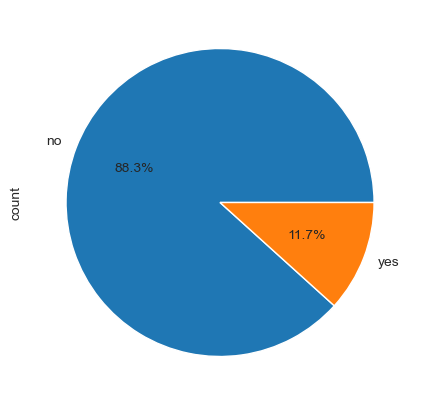

In [12]:
# Plot the distribution of the target variable
sns.countplot(x='y', data=data_frame)
plt.title('Target variable')
plt.show()

# Show pie plot 
plt.figure(figsize=(5,5))
data_frame['y'].value_counts().plot.pie(autopct='%1.1f%%')

#### Using SMOTE, the number of instances in each class is balanced

Before: Counter({'no': 27956, 'yes': 3691})
Class no: 27956 (88.34%)
Class yes: 3691 (11.66%)


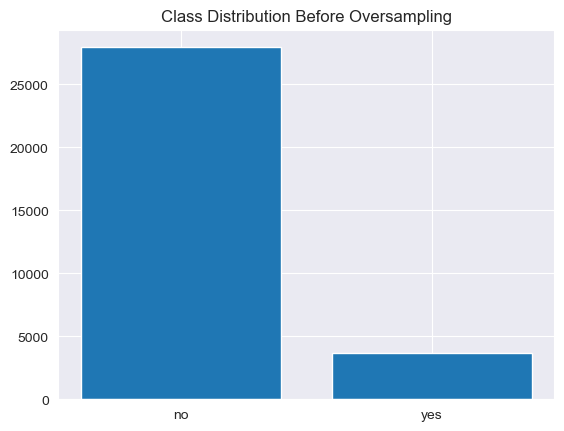

ValueError: could not convert string to float: 'technician'

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bank-full.csv', sep=';')

# Separate the features and the target
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Counting the number of instances in each class before oversampling
counter = Counter(y_train)
total_before = sum(counter.values())
print('Before:', counter)
for cls, count in counter.items():
    print(f'Class {cls}: {count} ({count / total_before:.2%})')
plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution Before Oversampling')
plt.show()

# Oversampling the train dataset using SMOTE
smt = SMOTE(random_state=139)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Counting the number of instances in each class after oversampling
counter = Counter(y_train_sm)
total_after = sum(counter.values())
print('After:', counter)
for cls, count in counter.items():
    print(f'Class {cls}: {count} ({count / total_after:.2%})')
plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution After Oversampling')
plt.show()

#### (7) --> Check for duplicates rows

In [14]:
# Check for duplicate rows
print(f"Duplicates: {data_frame.duplicated().sum()}")

Duplicates: 0


#### (6) --> Categorical variable encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

data_frame_1 = data_frame.copy()

le = LabelEncoder()
label_encoded_col = ['y', 'loan', 'housing', 'default']
for col in label_encoded_col:
    data_frame_1[col] = le.fit_transform(data_frame_1[col])  # 'yes' -> 1, 'no' -> 0

In [16]:
# dummy encode categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data_frame_1 = pd.get_dummies(data_frame_1, columns=categorical_columns, drop_first=False)

# Convert all boolean columns to 1 and 0
bool_columns = data_frame_1.select_dtypes(include='bool').columns
data_frame_1[bool_columns] = data_frame_1[bool_columns].astype(int)

data_frame_1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


#### (6) --> Check for outliers

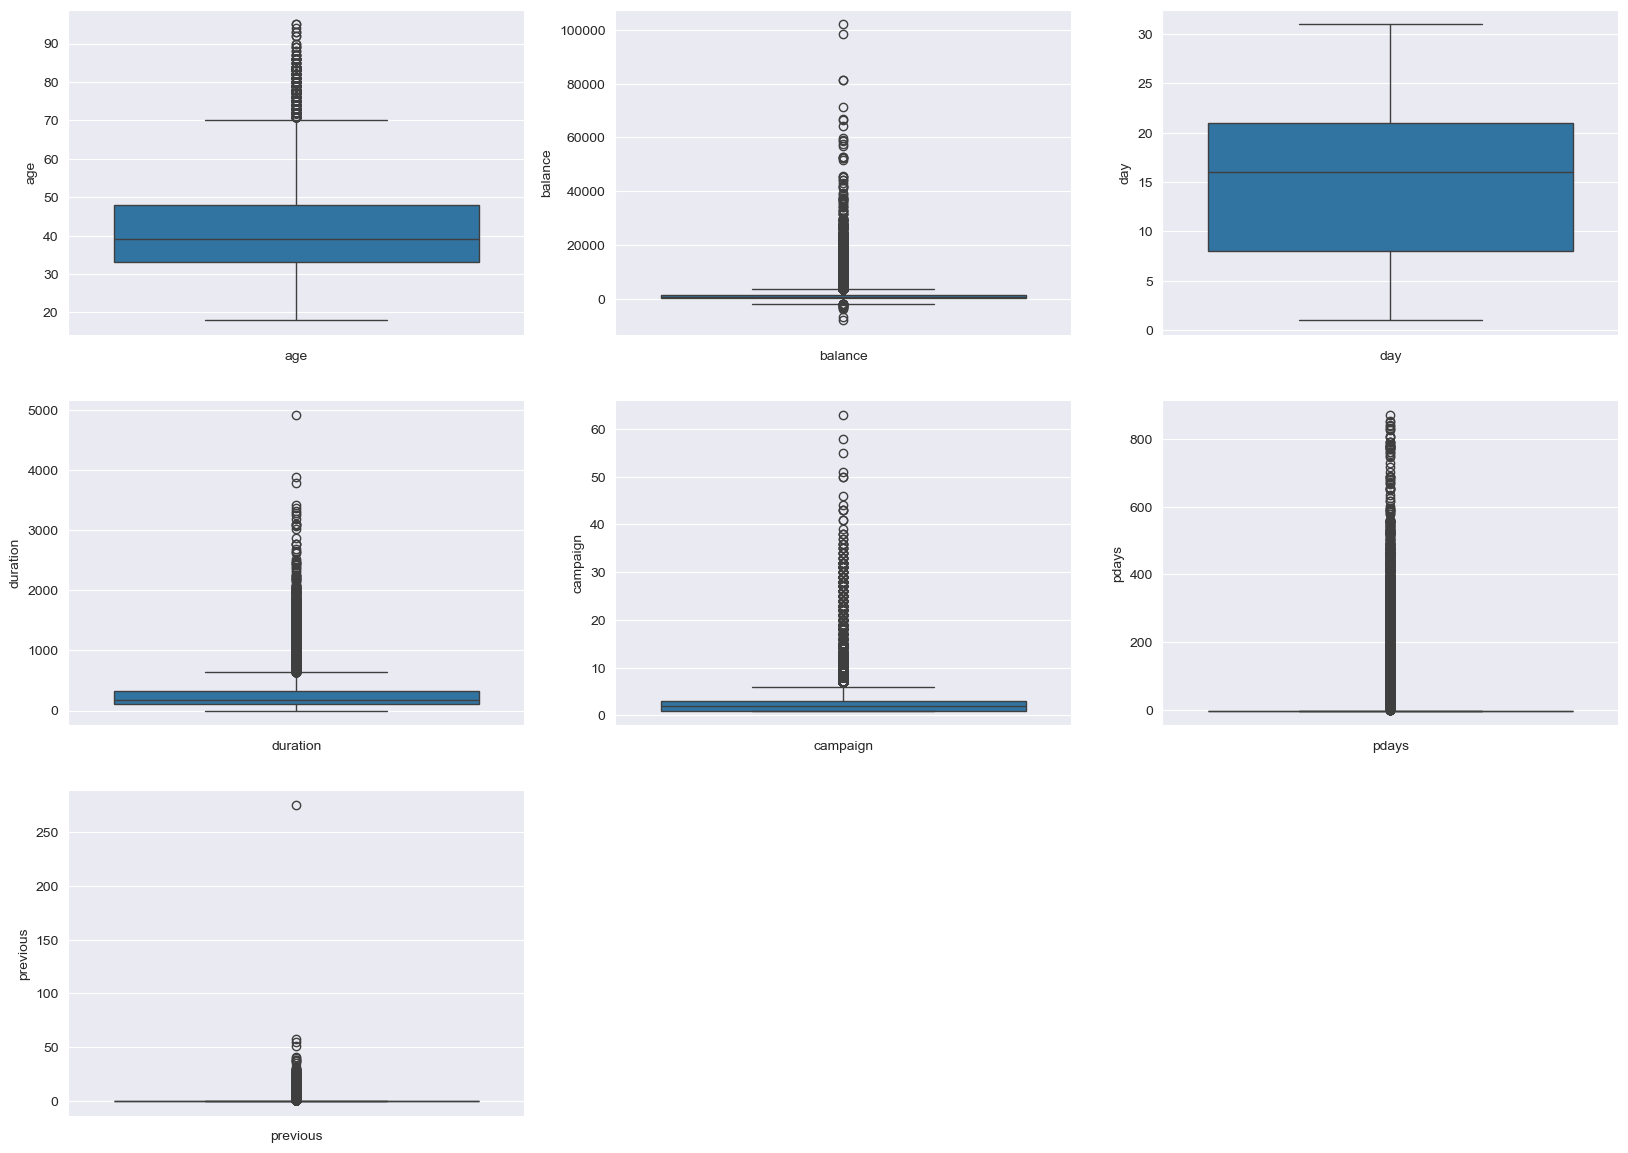

In [17]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in data_frame.select_dtypes(include='int64').columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data_frame[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

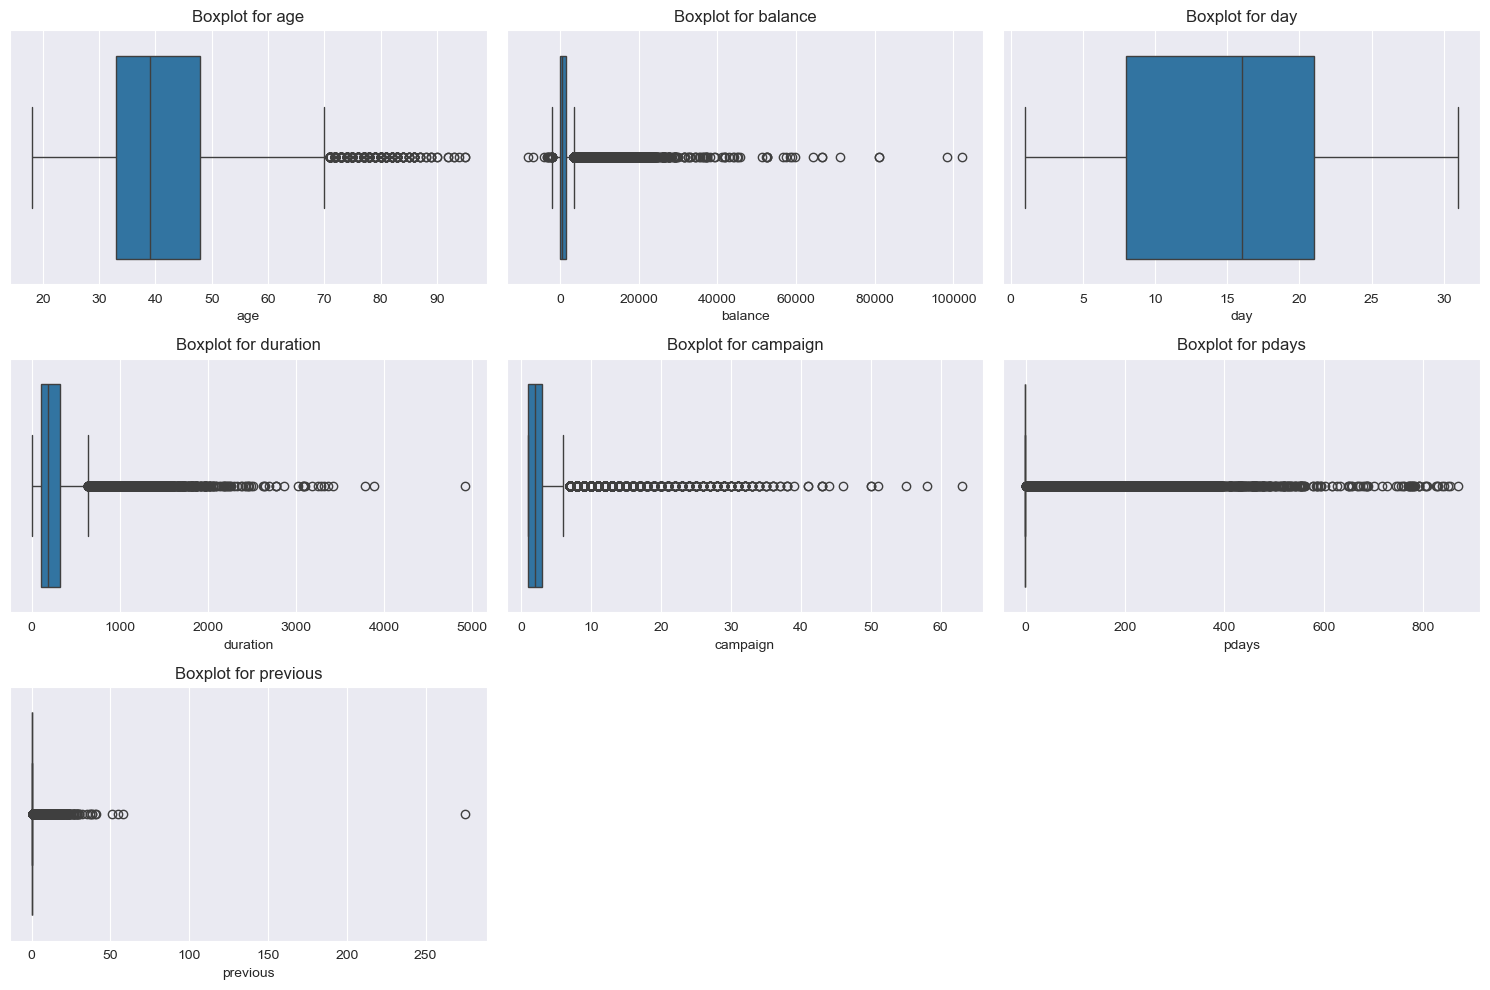

In [18]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Boxplot for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_1[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Winsorization function
def winsorize_column(column, lower_percentile=1, upper_percentile=99):
    lower_cutoff = np.percentile(column, lower_percentile)
    upper_cutoff = np.percentile(column, upper_percentile)
    return np.clip(column, lower_cutoff, upper_cutoff)

# Apply Winsorization to the dataset
df_winsorized = data_frame_1.copy()
for col in df.columns:
    df_winsorized[col] = winsorize_column(df[col])

# Plot box plots for each column in original and Winsorized DataFrames
fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 6 * len(df.columns)))

for i, col in enumerate(df.columns):
    # Original data box plot
    sns.boxplot(data=df, x=col, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Original Boxplot for {col}")
    
    # Winsorized data box plot
    sns.boxplot(data=df_winsorized, x=col, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"Winsorized Boxplot for {col}")

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'data_frame_1' is not defined

In [19]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}:")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {len(outliers)}\n")
    
    return lower_bound, upper_bound, outliers




In [20]:
# Apply the function to each numerical column
for col in numerical_columns:
    detect_outliers_iqr(data_frame_1, col)

age:
  Q1: 33.0, Q3: 48.0, IQR: 15.0
  Lower Bound: 10.5, Upper Bound: 70.5
  Number of Outliers: 487

balance:
  Q1: 72.0, Q3: 1428.0, IQR: 1356.0
  Lower Bound: -1962.0, Upper Bound: 3462.0
  Number of Outliers: 4729

day:
  Q1: 8.0, Q3: 21.0, IQR: 13.0
  Lower Bound: -11.5, Upper Bound: 40.5
  Number of Outliers: 0

duration:
  Q1: 103.0, Q3: 319.0, IQR: 216.0
  Lower Bound: -221.0, Upper Bound: 643.0
  Number of Outliers: 3235

campaign:
  Q1: 1.0, Q3: 3.0, IQR: 2.0
  Lower Bound: -2.0, Upper Bound: 6.0
  Number of Outliers: 3064

pdays:
  Q1: -1.0, Q3: -1.0, IQR: 0.0
  Lower Bound: -1.0, Upper Bound: -1.0
  Number of Outliers: 8257

previous:
  Q1: 0.0, Q3: 0.0, IQR: 0.0
  Lower Bound: 0.0, Upper Bound: 0.0
  Number of Outliers: 8257



In [21]:
def cap_outliers(data_frame_1, column):
    Q1 = data_frame_1[column].quantile(0.25)  # First quartile
    Q3 = data_frame_1[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values
    data_frame_1[column] = np.where(data_frame_1[column] < lower_bound, lower_bound, data_frame_1[column])
    data_frame_1[column] = np.where(data_frame_1[column] > upper_bound, upper_bound, data_frame_1[column])

# Cap outliers only for selected numerical columns where it makes sense
columns_to_cap = [ 'pdays'] 

for col in columns_to_cap:
    cap_outliers(data_frame_1, col)
    print(f"Outliers in {col} have been capped.")


Outliers in pdays have been capped.


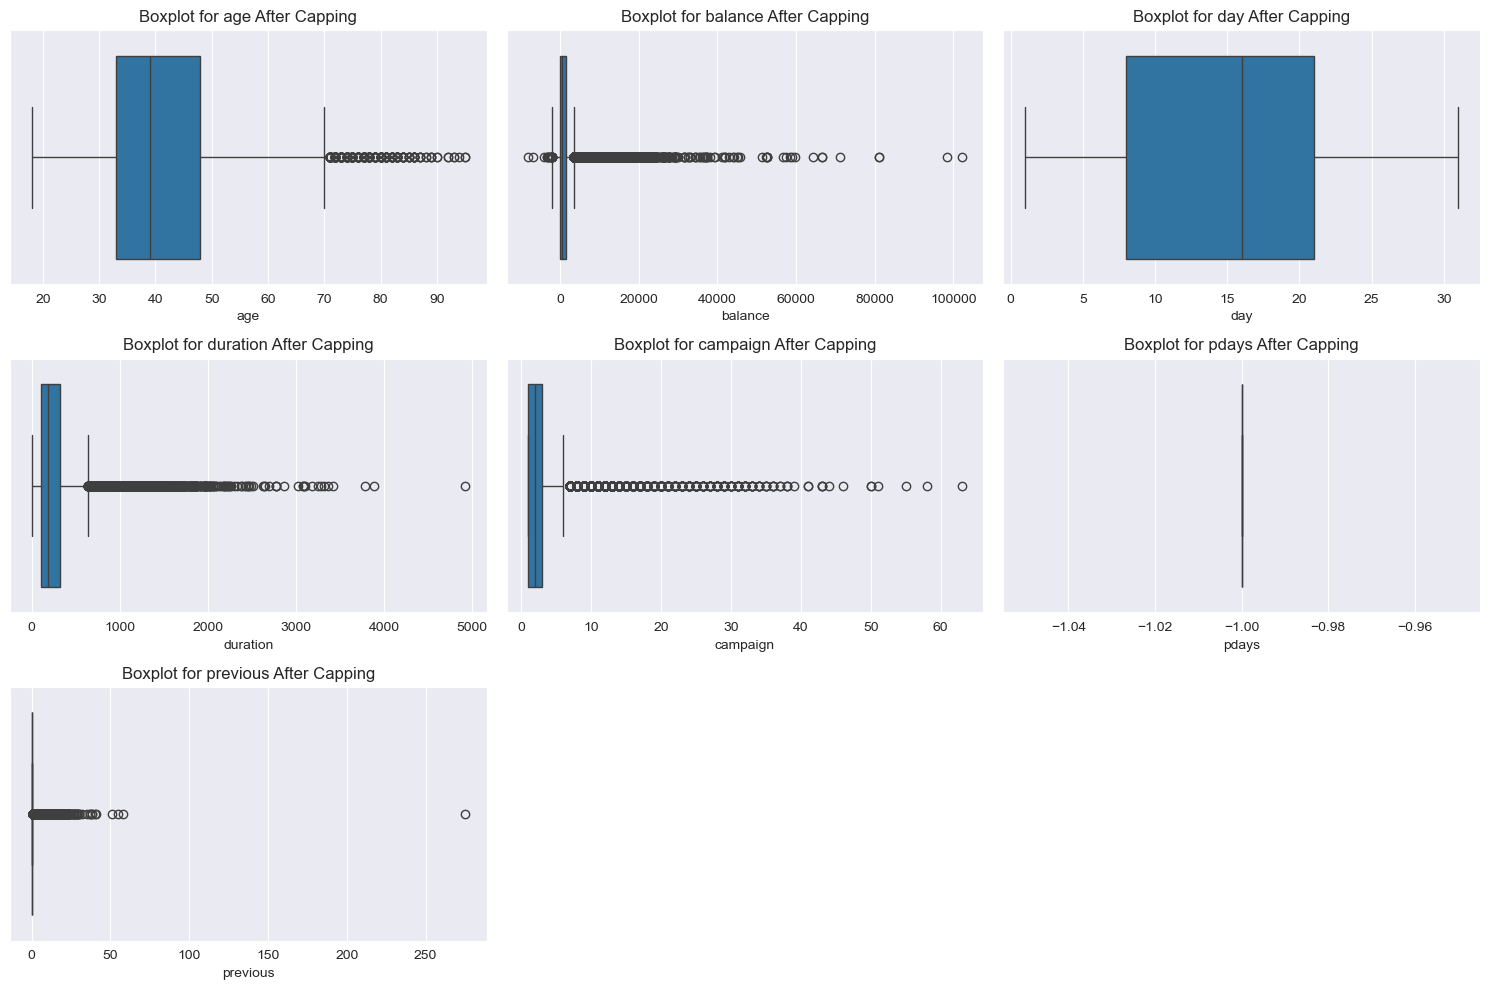

In [22]:
# Boxplot after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_1[col])
    plt.title(f"Boxplot for {col} After Capping")
plt.tight_layout()
plt.show()


In [23]:
print(data_frame_1)

       age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       58        0     2143        1     0    5       261         1   -1.0   
1       44        0       29        1     0    5       151         1   -1.0   
2       33        0        2        1     1    5        76         1   -1.0   
3       47        0     1506        1     0    5        92         1   -1.0   
4       33        0        1        0     0    5       198         1   -1.0   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45206   51        0      825        0     0   17       977         3   -1.0   
45207   71        0     1729        0     0   17       456         2   -1.0   
45208   72        0     5715        0     0   17      1127         5   -1.0   
45209   57        0      668        0     0   17       508         4   -1.0   
45210   37        0     2971        0     0   17       361         2   -1.0   

       previous  ...  month_jun  month_mar  month_m

In [24]:
# pdays column has a value of -1 only after capping
data_frame_1.groupby(['y','pdays']).size()

y  pdays
0  -1.0     39922
1  -1.0      5289
dtype: int64

In [25]:
# Before capping
data_frame.groupby(['y','pdays']).size()
# Get all number of rows
data_frame.shape[0]

# Get number of rows where pdays = -1
data_frame[data_frame['pdays'] == -1].shape[0]

# Get number of rows where pdays = -1 as a percentage of total rows
data_frame[data_frame['pdays'] == -1].shape[0] / data_frame.shape[0] * 100

81.73674548229414

#### previous column

In [26]:
# Drop the 'pdays' column
data_frame_1.drop('pdays', axis=1, inplace=True)

In [27]:
# remove outliers in feature previous...
data_frame_1.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           33570
   1            2189
   2            1650
   3             848
   4             543
               ...  
1  26              1
   29              1
   30              1
   55              1
   58              1
Name: previous, Length: 66, dtype: int64

In [28]:
data_frame_2 = data_frame_1[data_frame_1['previous'] < 20]

##### balance column

In [29]:
# remove outliers in feature previous...
data_frame_2.groupby(['y','balance'],sort=True)['balance'].count()

y  balance
0  -8019      1
   -6847      1
   -4057      1
   -3372      1
   -3313      1
             ..
1   34646     1
    36252     1
    45248     1
    52587     2
    81204     2
Name: balance, Length: 9253, dtype: int64

In [30]:
data_frame_2 = data_frame_2[data_frame_2['balance'] < 40000]

##### duration column

In [31]:
# remove outliers in feature previous...
data_frame_2.groupby(['y','duration'],sort=True)['duration'].count()

y  duration
0  0            3
   1            2
   2            3
   3            4
   4           15
               ..
1  3094         1
   3102         1
   3183         1
   3253         1
   3881         1
Name: duration, Length: 2625, dtype: int64

In [32]:
data_frame_2 = data_frame_2[data_frame_2['duration'] < 2000]

##### campaign column

In [33]:
# remove outliers in feature previous...
data_frame_2.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14951
   2           11074
   3            4892
   4            3194
   5            1620
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [34]:
data_frame_2 = data_frame_2[data_frame_2['campaign'] < 35]

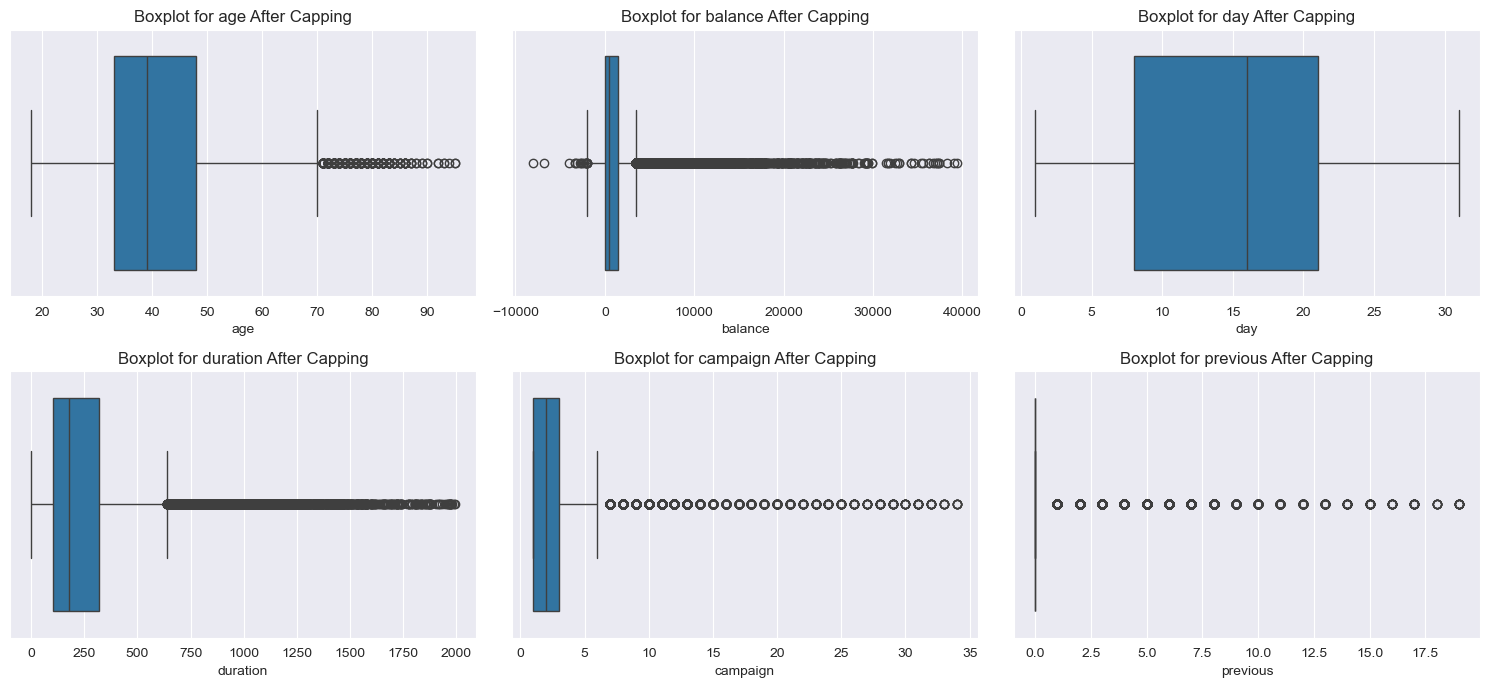

In [35]:
new_numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
# Boxplot after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(new_numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_frame_2[col])
    plt.title(f"Boxplot for {col} After Capping")
plt.tight_layout()
plt.show()


In [50]:
# Get first 1000 rows
data_frame_2.head(1000)

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,49,0,1377,1,0,7,1101,1,0,0,...,0,0,1,0,0,0,0,0,0,1
999,33,0,56,0,0,7,236,2,0,0,...,0,0,1,0,0,0,0,0,0,1
1000,47,0,0,1,0,7,164,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1001,50,0,73,0,0,7,93,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame_scaled = data_frame_2.copy()  # Avoid modifying the original dataset


# Apply scaling to numerical features
numerical_columns = ['balance', 'duration', 'campaign', 'previous']
data_frame_scaled[numerical_columns] = scaler.fit_transform(data_frame_scaled[numerical_columns])

data_frame_scaled

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0.214370,1,0,5,0.130893,0.000000,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,0.169775,1,0,5,0.075727,0.000000,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,0.169205,1,1,5,0.038114,0.000000,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,0.200932,1,0,5,0.046138,0.000000,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,0.169184,0,0,5,0.099298,0.000000,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0.186567,0,0,17,0.489970,0.060606,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,0.205637,0,0,17,0.228686,0.030303,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,0.289722,0,0,17,0.565196,0.121212,0.157895,1,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,0.183255,0,0,17,0.254764,0.090909,0.000000,0,...,0,0,0,1,0,0,0,0,0,1
